### Boston Housing Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston)

### Variables
>`CRIM` - per capita crime rate by town   
`ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.  
`INDUS` - proportion of non-retail business acres per town.  
`CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
`NOX` - nitric oxides concentration (parts per 10 million)  
`RM` - average number of rooms per dwelling  
`AGE` - proportion of owner-occupied units built prior to 1940  
`DIS` - weighted distances to five Boston employment centres  
`RAD` - index of accessibility to radial highways  
`TAX` - full-value property-tax rate per 10,000 USD    
`PTRATIO` - pupil-teacher ratio by town  
`B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
`LSTAT` - % lower status of the population  
`MEDV` - Median value of owner-occupied homes in $1000's

### import libraries and view Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Split Data

In [23]:
df_X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
df_y=df['MEDV']

# change to array
X_arr = np.array(df_X)
y_arr = np.array(df_y)

X_train, X_test, y_train, y_test = train_test_split(X_arr,y_arr, random_state=1) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


### Feature Selection

In [24]:
# constructing a train dataframe
train_df = pd.DataFrame(X_train, columns = ['CRIM','ZN','INDUS','CHAS',
                                            'NOX','RM','AGE','DIS','RAD',
                                            'TAX','PTRATIO','B','LSTAT'])

test_df = pd.DataFrame(X_test, columns = ['CRIM','ZN','INDUS','CHAS',
                                            'NOX','RM','AGE','DIS','RAD',
                                            'TAX','PTRATIO','B','LSTAT'])
train_df['MEDV']=y_train
train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
1,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69,23.1
2,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29,28.0
3,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0
4,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
375,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
376,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37,12.5
377,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88,24.0


In [25]:
train_df.corr()['MEDV']

CRIM      -0.389001
ZN         0.381399
INDUS     -0.485211
CHAS       0.166658
NOX       -0.458141
RM         0.654965
AGE       -0.426290
DIS        0.291071
RAD       -0.378258
TAX       -0.449415
PTRATIO   -0.502179
B          0.320686
LSTAT     -0.739389
MEDV       1.000000
Name: MEDV, dtype: float64

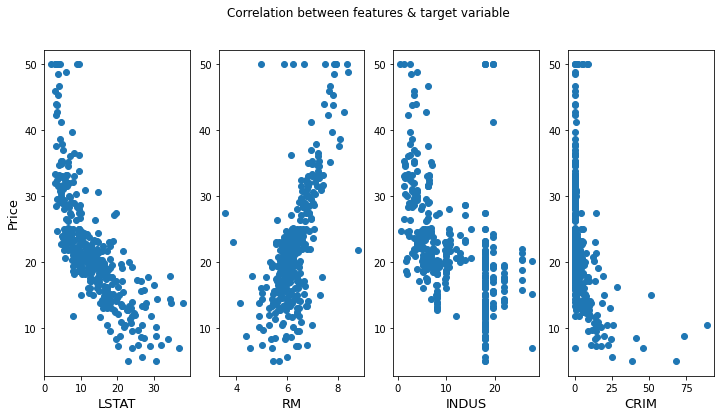

In [26]:
#selecting features
features = ['LSTAT','RM','INDUS','CRIM']

X_train = train_df[['LSTAT','RM','INDUS','CRIM']]
X_train = np.array(X_train)

X_test = test_df[['LSTAT','RM','INDUS','CRIM']]
X_test = np.array(X_test)

fig,ax = plt.subplots(1,4,figsize=(12,6))
for i in range(4):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(features[i], fontsize=13)
#ax.scatter(salary['YearsExperience'],salary['Salary'], c='g', marker='*')
#ax.set_xlabel('Years of experience', fontsize=12)
#ax.set_ylabel('Salary (USD)', fontsize=12)
ax[0].set_ylabel('Price', fontsize=13)
fig.suptitle("Correlation between features & target variable")
plt.show()

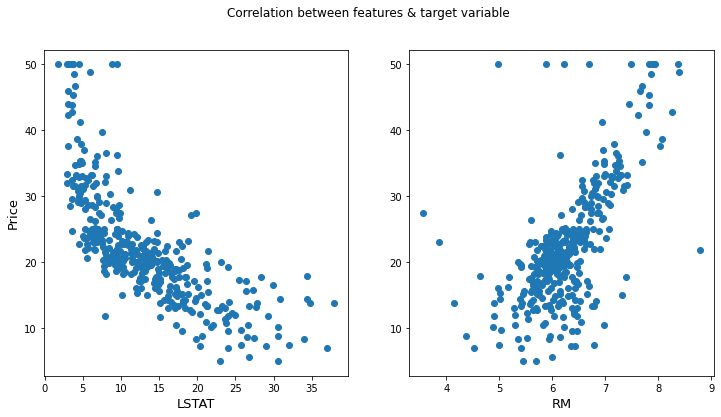

In [27]:
#Dropping INDUS & CRIM
features = ['LSTAT','RM']

X_train = train_df[['LSTAT','RM']]
X_train = np.array(X_train)

X_test = test_df[['LSTAT','RM']]
X_test = np.array(X_test)


fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(features[i], fontsize=13)
#ax.scatter(salary['YearsExperience'],salary['Salary'], c='g', marker='*')
#ax.set_xlabel('Years of experience', fontsize=12)
#ax.set_ylabel('Salary (USD)', fontsize=12)
ax[0].set_ylabel('Price', fontsize=13)
fig.suptitle("Correlation between features & target variable")
plt.show()

## Linear Regression - LSTAT & RM
> ### We will call it Model A

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [29]:
# model evaluation for training set

y_train_pred = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pred = linear_model.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.546416853519869
R2 score is 0.6124282780222445


The model performance for testing set
--------------------------------------
RMSE is 5.565082678411179
R2 score is 0.6873549116447074


## Linear Regression - LSTAT, RM, INDUS & CRIM

> ### We will call it Model B

In [30]:
# Select features 
features = ['LSTAT','RM','INDUS','CRIM']

X_train = train_df[['LSTAT','RM','INDUS','CRIM']]
X_train = np.array(X_train)

X_test = test_df[['LSTAT','RM','INDUS','CRIM']]
X_test = np.array(X_test)

In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [32]:
# model evaluation for training set

y_train_pred = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pred = linear_model.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.479112455140378
R2 score is 0.6217773814298384


The model performance for testing set
--------------------------------------
RMSE is 5.527942326524957
R2 score is 0.691514059644592


### Polynomial Regression


> ### We will call it Model C

In [43]:
# Select features 
features = ['LSTAT','RM']

X_train = train_df[['LSTAT','RM']]
X_train = np.array(X_train)

X_test = test_df[['LSTAT','RM']]
X_test = np.array(X_test)

In [44]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [47]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.501191329248246
R2 score of training set is 0.7447404401533946


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.197642499599123
R2 score of test set is 0.82212321751242


> ### We will call it Model D

In [36]:
# Select features 
features = ['LSTAT','RM','INDUS','CRIM']

X_train = train_df[['LSTAT','RM','INDUS','CRIM']]
X_train = np.array(X_train)

X_test = test_df[['LSTAT','RM','INDUS','CRIM']]
X_test = np.array(X_test)

In [37]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [41]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.4549250450559974
R2 score of training set is 0.8496150664270619


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.2973492449599484
R2 score of test set is 0.8902414740220329


## Intepretation of Results

#### Both Linear models performed comparable with Model 2 a bit better than model A.

> ## Model A (Linear Regression) - 
Features  
            - % lower status of the population   
           - average number of rooms per dwelling

#### The model A performance for the training set
RMSE of training set is 5.55  
R2 score of training set is 0.61


#### The model A performance for the test set
RMSE of test set is 5.56  
R2 score of test set is 0.69

> ## Model B (Linear Regression)  
4 Features   
            - % lower status of the population    
           - average number of rooms per dwelling  
           - proportion of non-retail business acres per town.  
           - per capita crime rate by town

#### The model B performance for the training set
RMSE of training set is 5.48  
R2 score of training set is 0.62


#### The model B performance for the test set
RMSE of test set is 5.53  
R2 score of test set is 0.69

----------------------------------------------------------

#### Both Polynomial models performed better than the linear models. The model will 4 features performed better than the model with 2 features. Based on the r2 score and mae, model D is recommended for predicting prices of housing in Boston.

> ## Model C (Polynomial Regression)
Features  
            - % lower status of the population   
           - average number of rooms per dwelling

#### The model C performance for the training set
RMSE of training set is 4.50​  
R2 score of training set is 0.74


#### The model C performance for the test set
RMSE of test set is 4.20
R2 score of test set is 0.82

> ## Model D (Polynomial Regression)
4 Features   
            - % lower status of the population    
           - average number of rooms per dwelling  
           - proportion of non-retail business acres per town.  
           - per capita crime rate by town

#### The model D performance for the training set
RMSE of training set is 3.45  
R2 score of training set is 0.85


#### The model D performance for the test set
RMSE of test set is 3.30  
R2 score of test set is 0.89

> ## Possible improvement

> Normalizing  
> Feature engineering 
